## An example of feedforward neural network implementation

In [1]:
import os
os.chdir("C:\\Users\\Bangda\\Desktop\\Python Study Group\\Project 1\\neural-networks-and-deep-learning-master\\src")

In [2]:
"""
network module

An implementation of feedforward network using SGD. Gradients are calculated by backpropagation.
This module is from Michael Nielsen, Neural Networks and Deep Learning (http://neuralnetworksanddeeplearning.com/chap1.html)
Here is the inner structure of network.py

I will change some parts of code a little bit when I think I have alternative understanding
(I mean the code looks more clearly for me)
"""

import random
import numpy as np

# sigmoid function and its derivative
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))


class Network:
    
    def __init__(self, sizes):
        """
        @param sizes, list
          contains the number of neurons in the respective layers, 
          e.g. [2, 3, 1], 2 will be input size; 3 is size of hidden layer; 1 is output size
        
        weights and bias are initialized randomly using standard Normal distribution
        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        # no bias for input neuron
        self.biases = [np.random.randn(num_neurons, 1) for num_neurons in sizes[1:]] 
        # weights between two layers forms into array with size m x n (m for prev layer)
        # generate n - 1 arrays for n layers
        self.weights = [np.random.randn(num_neurons_non_input, num_neurons_non_output)
                       for num_neurons_non_output, num_neurons_non_input in 
                       zip(sizes[:-1], sizes[1:])] 
    
    def feedforward(self, inputs):
        """
        return the weighted average of input
        """
        for bias, weights in zip(self.biases, self.weights):
            # every inputs of layer is the output of previous layer except the input layer
            inputs = sigmoid(np.dot(weights, inputs) + bias)
        
        outputs = inputs
        return outputs
    
    def SGD(self, training, epochs, mini_batch_size, eta, testing = None):
        """
        stochasic gradient descent implementation
        
        @param training, list
          elements are tuples (X, y)
        @param testing, format same as training
          if provided, the network will evaluate on the test data after each epoch
        """
        if testing:
            n_test = len(testing)
            
        n = len(training)
        for j in xrange(epochs):
            random.shuffle(training) # shuffle inplace
            
            # get a batch of the training data
            mini_batches = [training[k:k + mini_batch_size] for k in xrange(0, n, mini_batch_size)]
            
            # update 
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
                
            if testing:
                print('Epoch {0}: {1} / test size {2}'.format(j, self.evaluate(testing), n_test))
            else:
                print('Epoch {0} complete'.format(j))
    
    def update_mini_batch(self, mini_batch, eta):
        """
        update weights and biases by applying gradient descent using backpropagation to a signle mini batch
        
        @param mini_batch, list
          elements are tuples (X, y)
        @param eta, numeric
          learning rate
        """
        # initialization
        nabla_biases = [np.zeros(b.shape) for b in self.biases]
        nabla_weights = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_biases, delta_nabla_weights = self.backprop(x, y)
            nabla_biases = [nb + dnb for nb, dnb in zip(nabla_biases, delta_nabla_biases)]
            nabla_weights = [nw + dnw for nw, dnw in zip(nabla_weights, delta_nabla_weights)]
        
        self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_weights)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_biases)]
    
        
        
    def backprop(self, x, y):
        """
        backpropagation is actually not mentioned in chapter 1
        
        return a tuple (nabla_biases, nabla_weights), representing gradient of cost function
        nabla_biases and nabla_weights are layer-by-layer list of numpy arrays
        structures are similar to self.biases and self.weights
        """
        nabla_biases = [np.zeros(b.shape) for b in self.biases]
        nabla_weights = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations layer by layer
        zs = []  # list to store all the z vectors layer by layer
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_biases[-1] = delta
        nabla_weights[-1] = np.dot(delta, activations[-2].transpose())
        
        for layer in xrange(2, self.num_layers):
            z = zs[-layer]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-layer + 1].transpose(), delta) * sp
            nabla_biases[-layer] = delta
            nabla_weights[-layer] = np.dot(delta, activations[-layer - 1].transpose())

        return (nabla_biases, nabla_weights)
    
    def evaluate(self, testing):
        """
        return the number of test inputs for which the outputs the correct result
        where the output is the index of which neuron in the output layer has the highest value
        """
        pred_test = [(np.argmax(self.feedforward(x)), y) for (x, y) in testing]
        return sum(int(x == y) for (x, y) in pred_test)
    
    def cost_derivative(self, output_activations, y):
        return(output_activations - y)

In [3]:
import mnist_loader
training, validation, testing = mnist_loader.load_data_wrapper()
len(training), len(validation), len(testing)

(50000, 10000, 10000)

In [4]:
naive_network = Network([784, 30, 10])

In [5]:
naive_network.SGD(training, epochs = 30, mini_batch_size = 10, eta = 3.0, testing = testing)

Epoch 0: 7130 / test size 10000
Epoch 1: 7283 / test size 10000
Epoch 2: 7376 / test size 10000
Epoch 3: 7383 / test size 10000
Epoch 4: 7447 / test size 10000
Epoch 5: 7460 / test size 10000
Epoch 6: 8537 / test size 10000
Epoch 7: 8577 / test size 10000
Epoch 8: 8581 / test size 10000
Epoch 9: 8604 / test size 10000
Epoch 10: 8605 / test size 10000
Epoch 11: 8598 / test size 10000
Epoch 12: 8629 / test size 10000
Epoch 13: 8629 / test size 10000
Epoch 14: 8618 / test size 10000
Epoch 15: 8633 / test size 10000
Epoch 16: 8615 / test size 10000
Epoch 17: 8639 / test size 10000
Epoch 18: 8635 / test size 10000
Epoch 19: 8613 / test size 10000
Epoch 20: 8626 / test size 10000
Epoch 21: 8639 / test size 10000
Epoch 22: 8627 / test size 10000
Epoch 23: 8624 / test size 10000
Epoch 24: 8609 / test size 10000
Epoch 25: 8615 / test size 10000
Epoch 26: 8633 / test size 10000
Epoch 27: 8636 / test size 10000
Epoch 28: 8632 / test size 10000
Epoch 29: 8640 / test size 10000


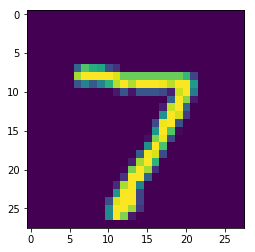

In [6]:
import matplotlib.pyplot as plt
X_test, y_test = testing[0][0], testing[0][1]
img_test = np.reshape(X_test, (28, 28))
plt.imshow(img_test)
plt.show()

In [7]:
print('Actual digit is {}'.format(y_test))
print('Predicted digit is {}'.format(np.argmax(naive_network.feedforward(X_test))))

Actual digit is 7
Predicted digit is 7
